Metodologia a usar:
- CRISP-DM

Intengrantes:
- Jehu Aravena
- Nicolas Montecinos

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

### CRISP-DM
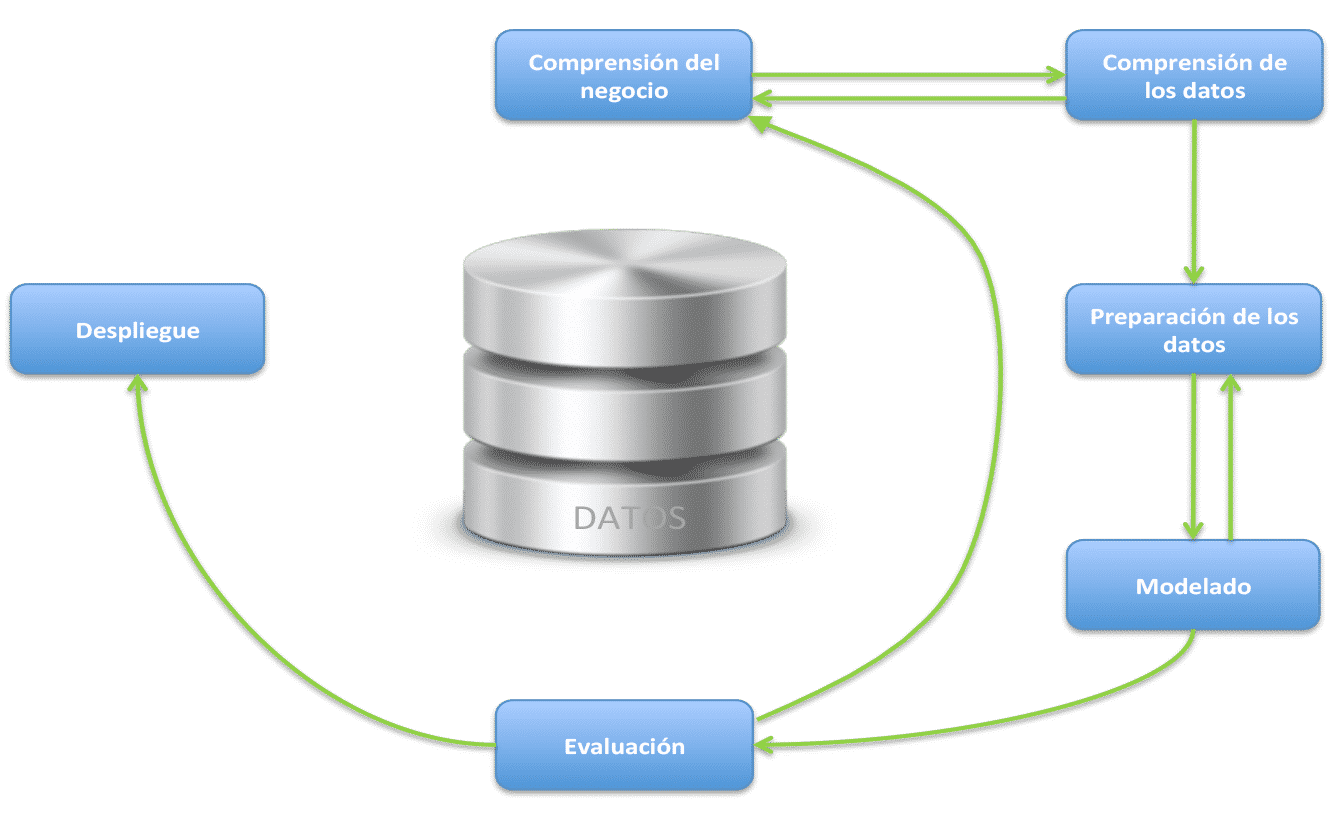

# Comprensión del negocio

El Gobierno de Chile busca implementar inteligencia artificial en su página web mediante el etiquetado de imágenes de distintos dominios. El objetivo principal del proyecto es seleccionar y clasificar imágenes, detectar objetos, estados de ánimo y rostros. Para lograr esto, se utilizarán técnicas de inteligencia artificial, como el Aprendizaje Automático, que permite a las computadoras aprender y generalizar patrones a partir de conocimiento previo.

Dentro del Aprendizaje Automático, se empleará el Aprendizaje Activo para mejorar la precisión y el rendimiento de los modelos de predicción. En este caso, se utilizará el conjunto de datos CIFAR-10, el cual consta de 60,000 imágenes en color de 32x32 píxeles, distribuidas en 10 clases con 6,000 imágenes por clase. Hay 50,000 imágenes para entrenamiento y 10,000 imágenes para pruebas. El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, con 1,000 imágenes seleccionadas al azar de cada clase en el lote de prueba. Los lotes de entrenamiento contienen las imágenes restantes, con exactamente 5,000 imágenes de cada clase, aunque algunos lotes pueden tener más imágenes de una clase que de otra.

# Comprensión de los datos

El siguiente código carga el conjunto de datos CIFAR-10 y muestra una cuadrícula de imágenes de prueba. Cada imagen se etiqueta con su clase correspondiente, representada por un título en la cuadrícula. Se utilizan funciones de la biblioteca matplotlib.pyplot para configurar la visualización, como desactivar las divisiones de ejes y ocultar las etiquetas de los ejes. La cuadrícula de imágenes proporciona una representación visual de las muestras del conjunto de datos CIFAR-10, lo que permite una comprensión rápida de las imágenes y sus etiquetas.

170498071/170498071 [==============================] - 13s 0us/step


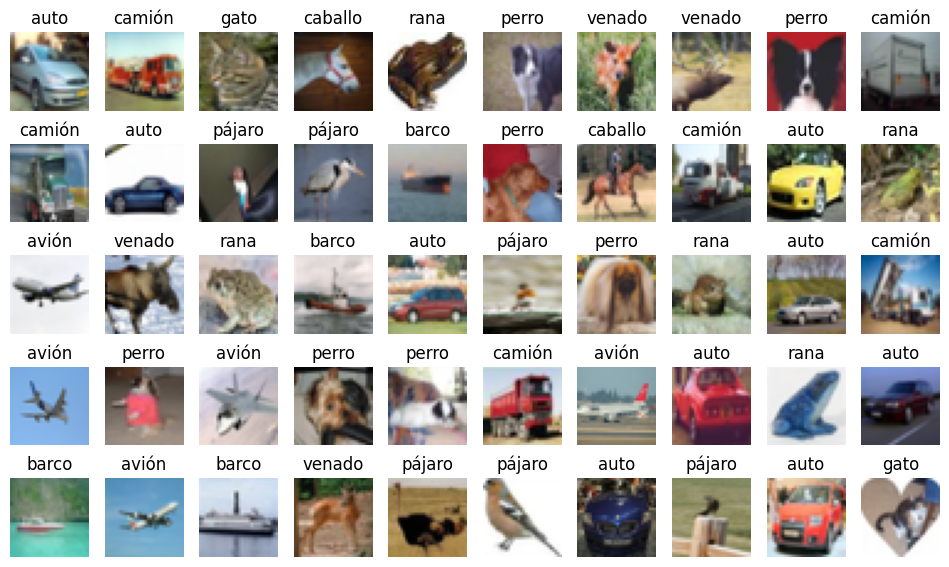

In [2]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data() # carga de datos

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión'] # nombres de las clases

h = 5 # alto de la cuadricula
w = 10 # ancho de la cuadricula
fig, axs = plt.subplots(h, w, figsize=(w+2, h+2)) # creación de la cuadricula
for i in range(h): # recorre las filas
  for j in range(w): # recorre las columnas
    ex = np.random.randint(len(imgs_test)) # elige un ejemplo al azar
    axs[i,j].set_title(nombres[labs_test[ex][0]]) # título de la imagen
    axs[i,j].imshow(imgs_test[ex]) # muestra la imagen
    axs[i,j].axis('off') # quita las rallitas de los ejes
plt.show()


Como se puede observar, el dataset está conformado por una serie de imágenes etiquetadas y de baja resolución. A simple vista, se pueden identificar nombres de clases como:
- Venado
- Caballo
- Camión
- Rana
- Avión
- Gato
- Perro
- Pájaro
- Auto
- Barco

Las imágenes no parecen tener ningún orden de distribución en particular.

## Categoría de las imágenes

Afortunadamente, las categorías de las imágenes tienen la misma cantidad de datos, por lo que no es necesario realizar un balanceo de los datos. Como se mencionó anteriormente, cada categoría tiene un total de 6,000 datos. Estos datos están distribuidos en lotes de 10,000, que se utilizarán para el entrenamiento.

## Dimensiones

En el conjunto de datos CIFAR-10, cada imagen tiene una resolución de 32x32 píxeles y tres canales de color (RGB). Por lo tanto, las dimensiones de los datos de entrenamiento y prueba son (50,000, 32, 32, 3) y (10,000, 32, 32, 3), respectivamente. En cuanto a las etiquetas, las dimensiones de las etiquetas de entrenamiento y prueba son (50,000, 10) y (10,000, 10), respectivamente. Estas dimensiones son esenciales para comprender la estructura de los datos y etiquetas en el conjunto CIFAR-10, y se utilizan en operaciones y análisis posteriores en el proceso de modelado y evaluación.

In [3]:
# (imgs_train, labs_train), (imgs_test, labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# Inspetion de los datos
print('Conjunto X')
print('Dimensiones de los datos de entrenamiento:', imgs_train.shape) # dimensiones de los datos de entrenamiento
print('Dimensiones de los datos de prueba:', imgs_test.shape) # dimensiones de los datos de prueba
print('\nConjunto Y')
print('Dimensiones de las etiquetas de entrenamiento:', labs_train.shape) # dimensiones de las etiquetas de entrenamiento
print('Dimensiones de las etiquetas de prueba:', labs_test.shape) # dimensiones de las etiquetas de prueba

Conjunto X
Dimensiones de los datos de entrenamiento: (50000, 32, 32, 3)
Dimensiones de los datos de prueba: (10000, 32, 32, 3)

Conjunto Y
Dimensiones de las etiquetas de entrenamiento: (50000, 1)
Dimensiones de las etiquetas de prueba: (10000, 1)


# Preparación de los datos

Debido a que se trabaja con imágenes, estas deben ser transformadas a un formato que pueda ser procesado por el modelo. Para lograr esto, se utilizan las bibliotecas Keras y TensorFlow, las cuales permiten cargar el conjunto de datos CIFAR-10 y transformar las imágenes a un formato adecuado para el procesamiento. Además, se realiza una normalización de los datos para que los valores de los píxeles estén en el rango de [0, 1].

In [5]:
X_train = imgs_train
X_train = X_train / 255

X_test = imgs_test
X_test = X_test / 255

print(X_train.shape, X_test.shape)

Y_train = labs_train
Y_test = labs_test

print(Y_train.shape, Y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


# Modelado (Fully Connected)

In [6]:
from tensorflow.keras import layers, regularizers

np.random.seed(30)
tf.random.set_seed(30)

### Modelo 1

En el siguiente modelo se utilizaron 3 capas densas con 530 y 400 neuronas con la activacion de tangente hiperbolica. Esta vez con el optimizador "SGD" pero con los parametros por defecto. Tanto el entrenamiento como la validacion fue bastante negativa dentro del entrenamiento. Esto puede deberse a que la activacion de tangente hiperbolica no se adapta muy bien a nuestro caso ademas de que el numero de neuronas tan grande sin ningun regularizador puede dar una tendencia bastante grande hacia el overfitting.


In [7]:
modelo1 = keras.Sequential([
    layers.Flatten(),
    layers.Dense(530, activation='tanh'),
    layers.Dense(400, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

modelo1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='sgd',
    metrics=['accuracy']
)

modelo1.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, Y_test)
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 [==============================] - 7s 6ms/step - loss: 1.9561 - accuracy: 0.3026 - val_loss: 1.8305 - val_accuracy: 0.3599
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.8061 - accuracy: 0.3669 - val_loss: 1.7814 - val_accuracy: 0.3728
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7530 - accuracy: 0.3865 - val_loss: 1.7375 - val_accuracy: 0.3863
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7158 - accuracy: 0.4013 - val_loss: 1.7031 - val_accuracy: 0.4079
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6862 - accuracy: 0.4131 - val_loss: 1.6621 - val_accuracy: 0.4162
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6571 - accuracy: 0.4200 - val_loss: 1.7037 - val_accuracy: 0.3946
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6339 - accuracy: 0.4279 - val_loss: 1.6461 - val_accuracy: 0.4163
Epoch 8/20
391/39

### Modelo 2

En el siguiente modelo, estamos utilizando la función de activación ReLU junto con el optimizador "SGD" nuevamente con los hiperparámetros por defecto. La diferencia principal, además del activador, es que se añadió una capa densa con 160 neuronas.

In [8]:
modelo2 = keras.Sequential([
    layers.Flatten(),
    keras.layers.Dense(530, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='sgd',
    metrics=['accuracy']
)

modelo2.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, Y_test)
)


Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 1.9769 - accuracy: 0.2906 - val_loss: 1.8476 - val_accuracy: 0.3535
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8017 - accuracy: 0.3634 - val_loss: 1.7548 - val_accuracy: 0.3839
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7271 - accuracy: 0.3886 - val_loss: 1.6865 - val_accuracy: 0.4059
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6729 - accuracy: 0.4080 - val_loss: 1.6609 - val_accuracy: 0.4205
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6332 - accuracy: 0.4256 - val_loss: 1.6039 - val_accuracy: 0.4375
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5989 - accuracy: 0.4371 - val_loss: 1.6067 - val_accuracy: 0.4315
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5688 - accuracy: 0.4452 - val_loss: 1.5702 - val_accuracy: 0.4426
Epoch

### Modelo 3

En este modelo se está utilizando la función de activación sigmoid. Al ser una función que tiene un gradiente más pequeño en ciertos rangos, se genera más fácilmente el desvanecimiento del gradiente. Esto impide que la red aprenda de manera correcta, ya que los pesos se actualizan de manera muy lenta o casi nula. Esto se refleja en la baja puntuación que da el modelo. A pesar de eso, cuando se combina con un optimizador adaptativo como Adam, la puntuación de la validación mejora significativamente. Sin embargo, los mejores resultados hasta ahora siguen siendo con ReLU, ya que tiene una mejor capacidad de adaptación, junto con SGD, para este caso en específico.

In [9]:
modelo3 = keras.Sequential([
    layers.Flatten(),
    keras.layers.Dense(530, activation='sigmoid'),
    keras.layers.Dense(400, activation='sigmoid'),
    keras.layers.Dense(160, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

modelo3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='sgd',
    metrics=['accuracy']
)

modelo3.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, Y_test)
)


Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 2.3075 - accuracy: 0.1033 - val_loss: 2.3007 - val_accuracy: 0.1036
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 2.2991 - accuracy: 0.1147 - val_loss: 2.2976 - val_accuracy: 0.1313
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 2.2957 - accuracy: 0.1302 - val_loss: 2.2936 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 3s 6ms/step - loss: 2.2919 - accuracy: 0.1484 - val_loss: 2.2889 - val_accuracy: 0.1941
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 2.2872 - accuracy: 0.1573 - val_loss: 2.2842 - val_accuracy: 0.1571
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 2.2816 - accuracy: 0.1662 - val_loss: 2.2804 - val_accuracy: 0.1571
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 2.2744 - accuracy: 0.1776 - val_loss: 2.2707 - val_accuracy: 0.1837
Epoch 

### Modelo 4

En el siguiente modelo, se realizará un entrenamiento utilizando el regularizador de Dropout, que consiste en apagar un porcentaje de las neuronas de forma aleatoria durante el entrenamiento. Esto se hace para evitar el sobreajuste. Sin embargo, a pesar de haber implementado esta técnica y haber eliminado una capa oculta, no hubo mucha variación en el porcentaje de validación. La pérdida se mantuvo casi igual que en el modelo 2 y la precisión incluso empeoró.

In [10]:
modelo4 = keras.Sequential([
    layers.Flatten(),
    keras.layers.Dense(530, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

modelo4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='sgd',
    metrics=['accuracy']
)

modelo4.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, Y_test)
)


Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 2.0575 - accuracy: 0.2515 - val_loss: 1.8811 - val_accuracy: 0.3408
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.8748 - accuracy: 0.3338 - val_loss: 1.7946 - val_accuracy: 0.3628
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8027 - accuracy: 0.3601 - val_loss: 1.7371 - val_accuracy: 0.3848
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7539 - accuracy: 0.3773 - val_loss: 1.6858 - val_accuracy: 0.4109
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7135 - accuracy: 0.3942 - val_loss: 1.6481 - val_accuracy: 0.4200
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 1.6811 - accuracy: 0.4058 - val_loss: 1.6330 - val_accuracy: 0.4328
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6559 - accuracy: 0.4150 - val_loss: 1.6068 - val_accuracy: 0.4273
Epoch 

### Modelo 5

En el siguiente modelo se utilizó la función de activación ReLU. A diferencia de la función tanh, la función ReLU produce valores no negativos, lo que significa que su rango está entre [0, +infinito]. Esto ayudó a mitigar el problema del desvanecimiento del gradiente, que se explicará con más detalle en el siguiente modelo de entrenamiento. En este caso, también se utilizó el optimizador Adam, que a diferencia de SGD, es un optimizador de aprendizaje adaptativo. La principal diferencia entre estos dos optimizadores es que SGD tiene un aprendizaje constante, actualizando los pesos del modelo en función del gradiente de la función de pérdida en cada paso. Por otro lado, Adam es un optimizador más avanzado que tiene aprendizaje adaptativo para actualizar los pesos del modelo. Ajusta automáticamente la tasa de aprendizaje para cada parámetro del modelo.

In [11]:
modelo5 = keras.Sequential([
    layers.Flatten(),
    keras.layers.Dense(530, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

modelo5.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, Y_test)
)


Epoch 1/20
391/391 [==============================] - 5s 6ms/step - loss: 1.8910 - accuracy: 0.3150 - val_loss: 1.7391 - val_accuracy: 0.3643
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6663 - accuracy: 0.4017 - val_loss: 1.6901 - val_accuracy: 0.3933
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5713 - accuracy: 0.4373 - val_loss: 1.5394 - val_accuracy: 0.4551
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5154 - accuracy: 0.4593 - val_loss: 1.5070 - val_accuracy: 0.4590
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 1.4666 - accuracy: 0.4765 - val_loss: 1.5001 - val_accuracy: 0.4713
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.4311 - accuracy: 0.4879 - val_loss: 1.4409 - val_accuracy: 0.4880
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.3983 - accuracy: 0.5013 - val_loss: 1.4878 - val_accuracy: 0.4774
Epoch 

### EarlyStopping

En el siguiente código, se utilizó el método EarlyStopping con el parámetro patience = 2. Este método se encarga de monitorear el entrenamiento en cada iteración y se detiene cuando no se detecta una mejora en la puntuación después de un cierto número (x) de iteraciones especificado por el hiperparámetro patience. Sin embargo, en este caso en particular puede no ser recomendable utilizarlo, ya que el número reducido de épocas podría limitar la búsqueda de coincidencias y no mostrar el verdadero potencial del entrenamiento (en este caso en particular). No obstante, se recomienda utilizarlo especialmente cuando se tiene un entrenamiento más estable y/o con un mayor número de épocas.

In [12]:
from keras.api._v2.keras import callbacks

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

modelo5_es = keras.Sequential([
    layers.Flatten(),
    keras.layers.Dense(530, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo5_es.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

modelo5_es.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, Y_test),
    callbacks=[es]
)


Epoch 1/20
391/391 [==============================] - 4s 6ms/step - loss: 1.9146 - accuracy: 0.3085 - val_loss: 1.7110 - val_accuracy: 0.3840
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6812 - accuracy: 0.3973 - val_loss: 1.6709 - val_accuracy: 0.4029
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5753 - accuracy: 0.4360 - val_loss: 1.5684 - val_accuracy: 0.4365
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5194 - accuracy: 0.4586 - val_loss: 1.5389 - val_accuracy: 0.4434
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 1.4742 - accuracy: 0.4719 - val_loss: 1.4960 - val_accuracy: 0.4671
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.4320 - accuracy: 0.4888 - val_loss: 1.4603 - val_accuracy: 0.4770
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.4024 - accuracy: 0.4993 - val_loss: 1.5018 - val_accuracy: 0.4674
Epoch 

# Evaluación

Los gráficos muestran la evolución de la pérdida en los modelos durante el entrenamiento. En el gráfico, el color azul representa la pérdida en el conjunto de entrenamiento, mientras que el otro color representa la pérdida en el conjunto de prueba (validación).

La pérdida es una medida que indica qué tan alejadas están las predicciones del modelo de los valores reales. En el entrenamiento, el objetivo es minimizar esta pérdida, lo que implica que el modelo se está ajustando cada vez más a los datos de entrenamiento.

Observando los gráficos, podemos notar lo siguiente:
- Si la pérdida en el conjunto de entrenamiento disminuye rápidamente y se acerca a cero, mientras que la pérdida en el conjunto de prueba también disminuye, indica que el modelo está aprendiendo correctamente y generalizando bien a nuevos datos.
- Si la pérdida en el conjunto de entrenamiento disminuye rápidamente pero la pérdida en el conjunto de prueba se mantiene alta, puede ser un signo de sobreajuste. Esto significa que el modelo está memorizando los datos de entrenamiento y no es capaz de generalizar a nuevos datos.
- Si la pérdida en ambos conjuntos disminuye lentamente o se estabiliza, podría indicar que el modelo ha alcanzado su límite de rendimiento y no hay mucho más que pueda mejorar.

### Modelo 1

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

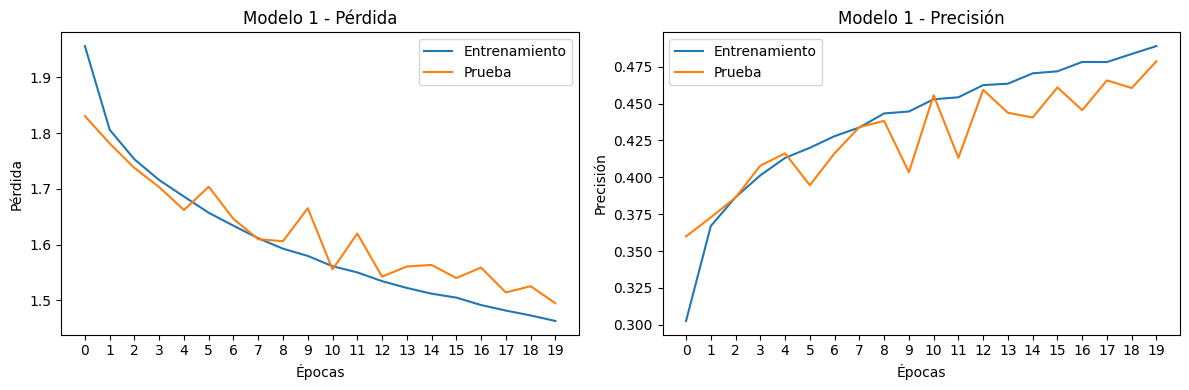

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo1.history.history['loss'])), y=modelo1.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1.history.history['val_loss'])), y=modelo1.history.history['val_loss'], label='Prueba')
plt.title('Modelo 1 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo1.history.history['loss'])), range(len(modelo1.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo1.history.history['accuracy'])), y=modelo1.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1.history.history['val_accuracy'])), y=modelo1.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 1 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo1.history.history['accuracy'])), range(len(modelo1.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis:
Como se puede ver en el gráfico, el rendimiento del modelo fue bastante bajo en todos los aspectos. En cuanto a estabilidad, se observan constantemente diferentes picos de pérdida y una precisión sumamente baja. Lo cierto es que esto podría deberse a varios factores, pero como base, los modelos FullyConnected no se adaptan bien a las predicciones relacionadas con imágenes, donde se requiere discriminar características específicas. Por ahora, no es recomendable tener en cuenta este modelo para producción, ya que su capacidad de generalización es muy baja.

### Modelo 2

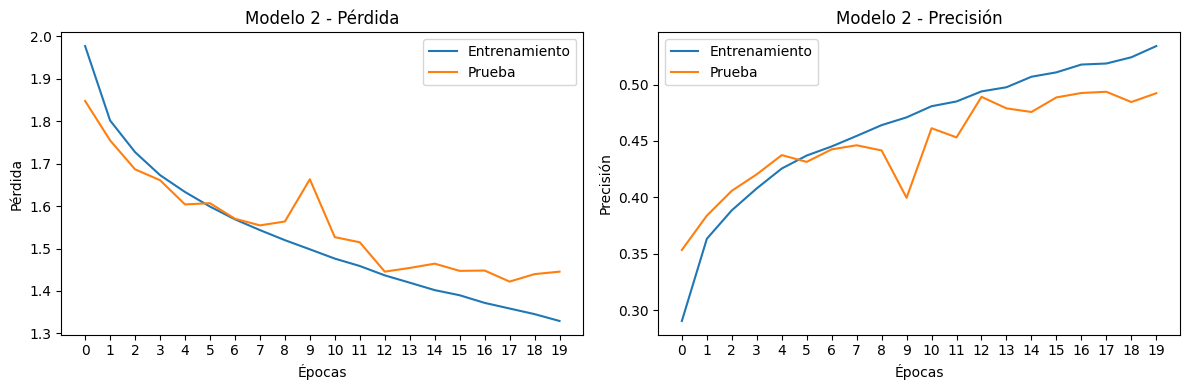

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo2.history.history['loss'])), y=modelo2.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo2.history.history['val_loss'])), y=modelo2.history.history['val_loss'], label='Prueba')
plt.title('Modelo 2 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo2.history.history['loss'])), range(len(modelo2.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo2.history.history['accuracy'])), y=modelo2.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo2.history.history['val_accuracy'])), y=modelo2.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 2 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo2.history.history['accuracy'])), range(len(modelo2.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis:
En los resultados pudimos ver que si bien obtuvimos una ligera mejora, en especial en la precisión del modelo, obtuvimos muchos resultados desfavorables en general. El rendimiento del entrenamiento fue algo más estable que el anterior, pero con picos de pérdida mucho más notables y con una precisión bastante despreciable. Lo cierto es que al no separarse tanto del entrenamiento, la validación podría estar mostrando que el modelo no tiene mucha capacidad de mejora, por lo que se considera como mejor alternativa descartar este modelo.

### Modelo 3

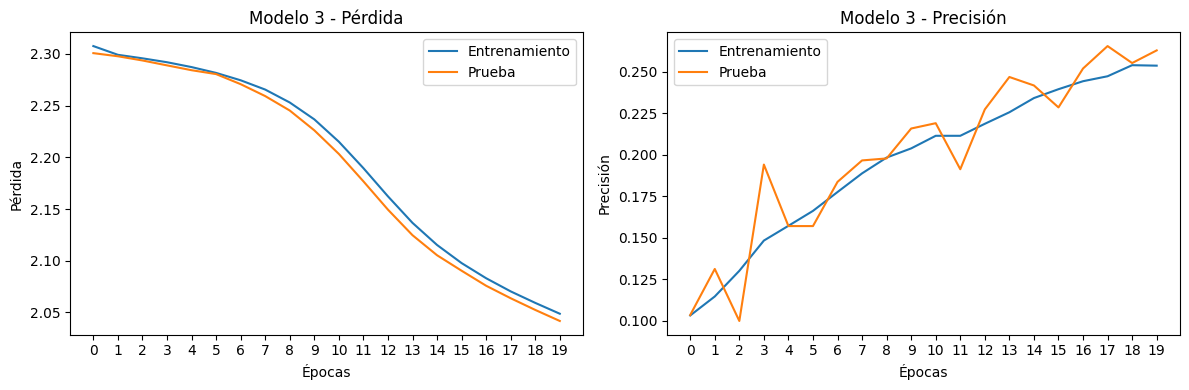

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo3.history.history['loss'])), y=modelo3.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo3.history.history['val_loss'])), y=modelo3.history.history['val_loss'], label='Prueba')
plt.title('Modelo 3 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo3.history.history['loss'])), range(len(modelo3.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo3.history.history['accuracy'])), y=modelo3.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo3.history.history['val_accuracy'])), y=modelo3.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 3 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo3.history.history['accuracy'])), range(len(modelo3.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis:
Como se puede observar, los resultados fueron los peores o más bajos de todos los modelos hasta ahora, mostrando una pérdida que, si bien tuvo una tendencia a la disminución, se estancó en 2.0. Esto indica una pérdida inaceptable. Además, la precisión en la validación fue sumamente inestable y muy baja. En el gráfico de la pérdida se evidencia que este modelo probablemente no pueda mejorar en absoluto manteniendo la arquitectura actual. Por lo tanto, se descarta por completo este modelo.

### Modelo 4

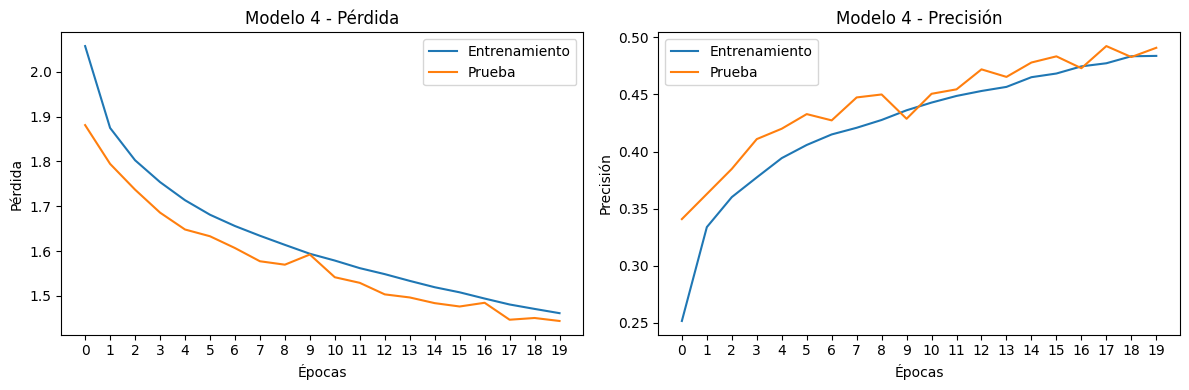

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo4.history.history['loss'])), y=modelo4.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo4.history.history['val_loss'])), y=modelo4.history.history['val_loss'], label='Prueba')
plt.title('Modelo 4 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo4.history.history['loss'])), range(len(modelo4.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo4.history.history['accuracy'])), y=modelo4.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo4.history.history['val_accuracy'])), y=modelo4.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 4 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo4.history.history['accuracy'])), range(len(modelo4.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis:
Como se puede ver, el entrenamiento y la validación no obtuvieron los mejores resultados, obteniendo resultados similares al modelo 2, pero sin posibilidades de una mejora significativa. Aunque con un mejor rendimiento en lo que respecta al entrenamiento y la estabilidad. Aunque por ahora mostró las mejores capacidades de generalización dentro de los modelos FullyConnected. Aun así, por la orientación de la validación en comparación con el entrenamiento, se podría decir que está sufriendo de sobreajuste (overfitting).

### Modelo 5

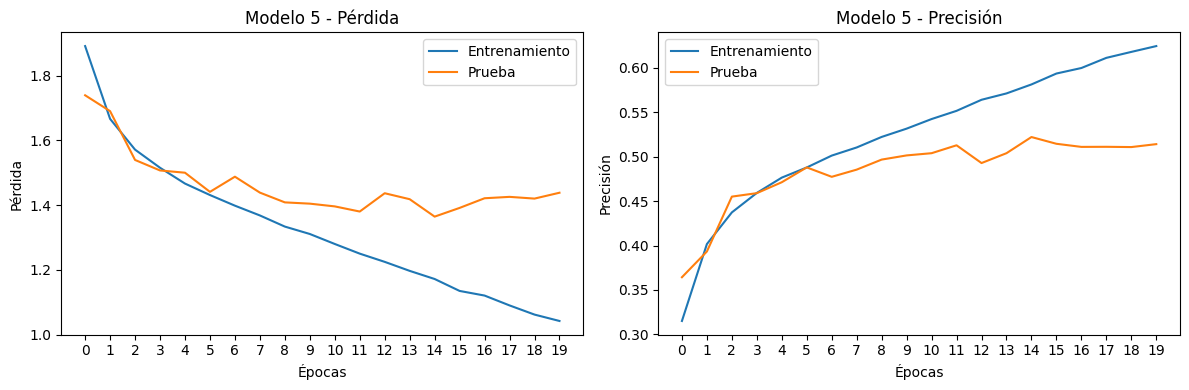

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo5.history.history['loss'])), y=modelo5.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo5.history.history['val_loss'])), y=modelo5.history.history['val_loss'], label='Prueba')
plt.title('Modelo 5 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo5.history.history['loss'])), range(len(modelo5.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo5.history.history['accuracy'])), y=modelo5.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo5.history.history['val_accuracy'])), y=modelo5.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 5 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo5.history.history['accuracy'])), range(len(modelo5.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis 1:

En los resultados del modelo, lo cierto es que el rendimiento no fue muy diferente a lo que se pudo observar en el modelo 4, con la diferencia principal de que se observa una separación mucho más amplia entre el entrenamiento y la validación. Esto, si bien es una clara muestra de sobreajuste (overfitting), también indica que este modelo tiene una mejor capacidad de mejora y podría conseguir mejores resultados si se ajustan ciertos parámetros o se realiza alguna modificación en la arquitectura.

### Modelo 5 (Early Stopping)

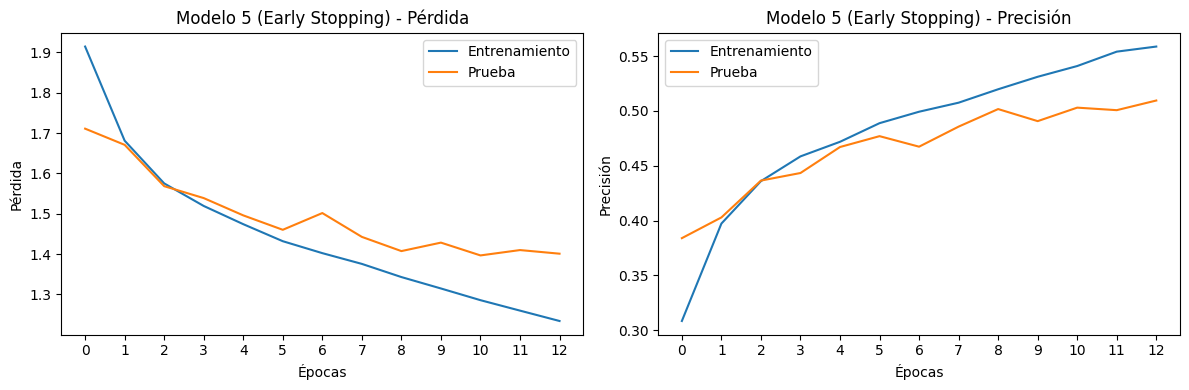

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo5_es.history.history['loss'])), y=modelo5_es.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo5_es.history.history['val_loss'])), y=modelo5_es.history.history['val_loss'], label='Prueba')
plt.title('Modelo 5 (Early Stopping) - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo5_es.history.history['loss'])), range(len(modelo5_es.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo5_es.history.history['accuracy'])), y=modelo5_es.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo5_es.history.history['val_accuracy'])), y=modelo5_es.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 5 (Early Stopping) - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo5_es.history.history['accuracy'])), range(len(modelo5_es.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis 2:

A pesar de que se aplicó Early Stopping y en teoría debería ayudar a aumentar la generalización del modelo, lo cierto es que no hubo un cambio sustancial o siquiera apreciable a simple vista. Por ahora, tanto el modelo 5 como el modelo 5 con Early Stopping podrían utilizarse para mejorar la arquitectura.

# Despliegue

Aquí se muestra una cuadrícula utilizando como base el mejor modelo en función de las evaluaciones, en este caso el modelo sería el modelo 2. Sin embargo, debido a la baja precisión del modelo, no sería recomendable ponerlo en producción.

313/313 [==============================] - 1s 3ms/step


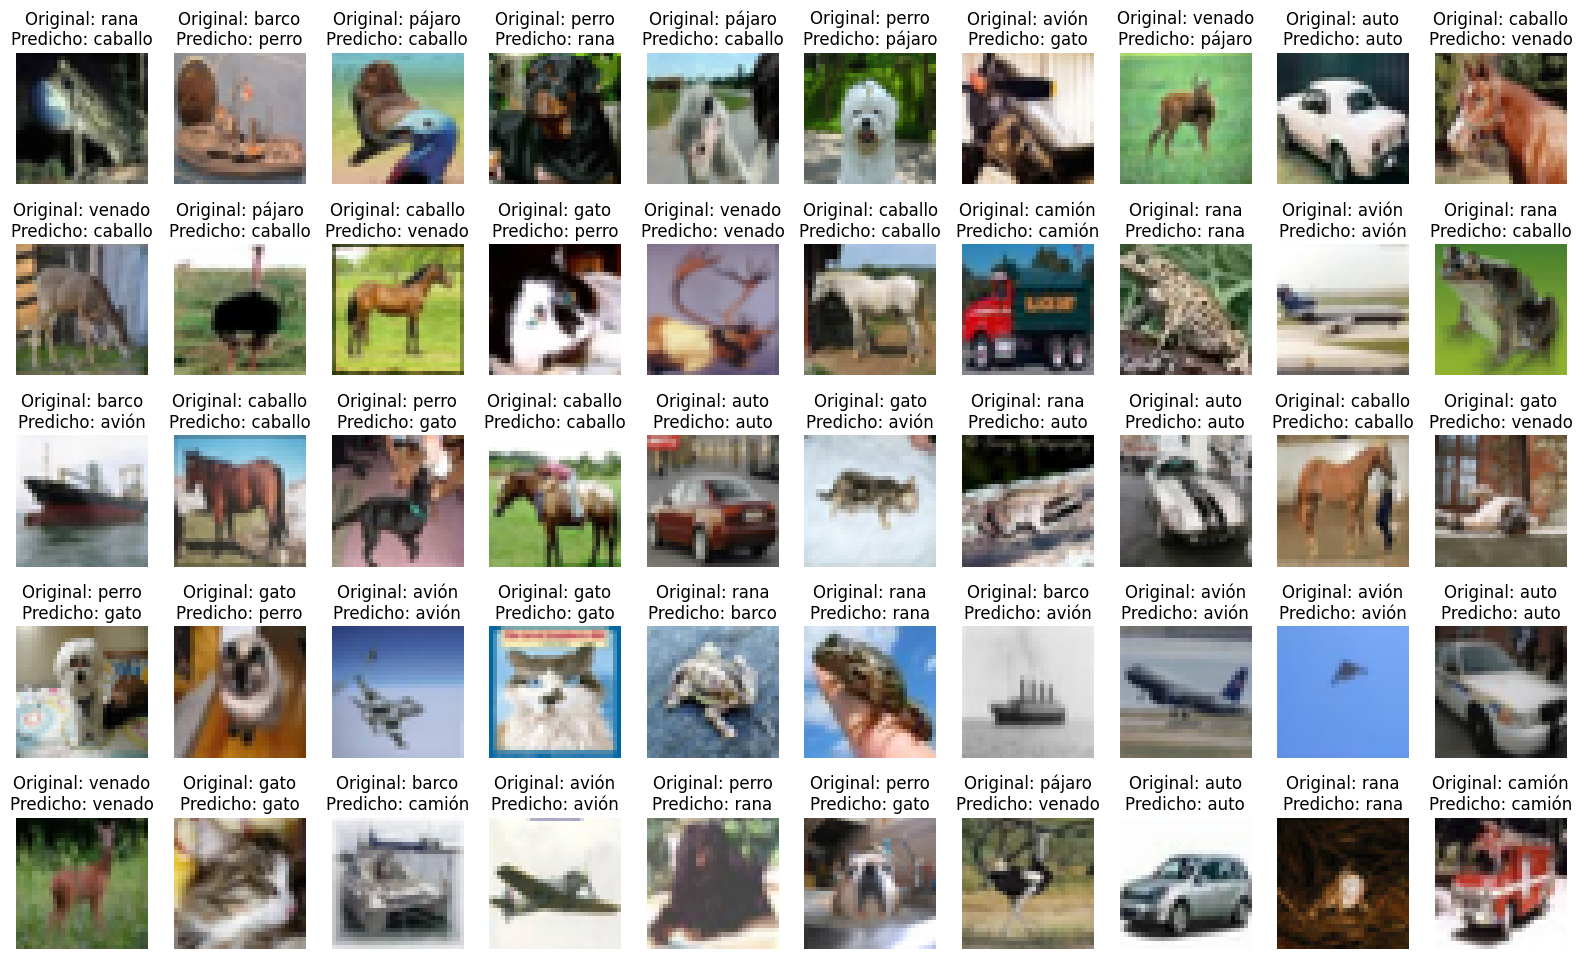

In [20]:
predicciones = modelo2.predict(X_test)

indices_ejemplos = random.sample(range(len(imgs_test)), h*w)

fig, axs = plt.subplots(h, w, figsize=(w+10, h+7))

for i in range(h):
    for j in range(w):
        indice = indices_ejemplos[i*w+j]
        imagen = imgs_test[indice]
        nombre_original = nombres[labs_test[indice][0]]
        nombre_predicho = nombres[np.argmax(predicciones[indice])]

        axs[i,j].imshow(imagen)
        axs[i,j].set_title(f'Original: {nombre_original}\nPredicho: {nombre_predicho}')
        axs[i,j].axis('off')

plt.show()


# Modelado (Convolucional)

### Modelo 6

In [21]:
modelo6 = keras.Sequential([
    layers.Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelo6.compile(optimizer='adamax',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

modelo6.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 [==============================] - 10s 9ms/step - loss: 1.7795 - accuracy: 0.3506 - val_loss: 1.5503 - val_accuracy: 0.4412
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.4632 - accuracy: 0.4725 - val_loss: 1.3824 - val_accuracy: 0.5095
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3479 - accuracy: 0.5219 - val_loss: 1.3070 - val_accuracy: 0.5334
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 1.2666 - accuracy: 0.5524 - val_loss: 1.2575 - val_accuracy: 0.5641
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 1.1988 - accuracy: 0.5781 - val_loss: 1.1688 - val_accuracy: 0.5915
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1415 - accuracy: 0.6004 - val_loss: 1.1658 - val_accuracy: 0.5958
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0788 - accuracy: 0.6233 - val_loss: 1.1673 - val_accuracy: 0.5931
Epoch 8/20
391/3

##Modelo 6 (Con Padding y Pooling)

In [22]:
modelo6_pd = keras.Sequential([ # pd = padding y dropout
    layers.Conv2D(32, (3, 3), padding ='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding ='same', activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Dropout(0.35),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelo6_pd.compile(optimizer='adamax',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

modelo6_pd.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 6s 11ms/step - loss: 1.6325 - accuracy: 0.4080 - val_loss: 1.5850 - val_accuracy: 0.5150
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 1.2806 - accuracy: 0.5445 - val_loss: 1.3955 - val_accuracy: 0.5729
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1339 - accuracy: 0.6007 - val_loss: 1.2875 - val_accuracy: 0.6050
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0340 - accuracy: 0.6387 - val_loss: 1.1825 - val_accuracy: 0.6580
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9536 - accuracy: 0.6673 - val_loss: 1.1109 - val_accuracy: 0.6726
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8858 - accuracy: 0.6920 - val_loss: 1.0820 - val_accuracy: 0.6652
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8299 - accuracy: 0.7122 - val_loss: 1.0367 - val_accuracy: 0.6952

### Modelo 7

In [23]:
modelo7 = keras.Sequential([
    # original
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # duplicado 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # duplicado 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # fully connected
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

modelo7.compile(optimizer='adamax',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

modelo7.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/20
782/782 [==============================] - 17s 14ms/step - loss: 2.1629 - accuracy: 0.3727 - val_loss: 1.6204 - val_accuracy: 0.4950
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 1.5877 - accuracy: 0.5199 - val_loss: 1.5687 - val_accuracy: 0.5426
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 1.3091 - accuracy: 0.6099 - val_loss: 1.2181 - val_accuracy: 0.6281
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 1.1282 - accuracy: 0.6675 - val_loss: 0.9810 - val_accuracy: 0.7145
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 1.0037 - accuracy: 0.7028 - val_loss: 0.8410 - val_accuracy: 0.7559
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.9103 - accuracy: 0.7299 - val_loss: 0.7896 - val_accuracy: 0.7665
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 0.8391 - accuracy: 0.7481 - val_loss: 0.7747 - val_accuracy:

# Evaluación

### Modelo 6

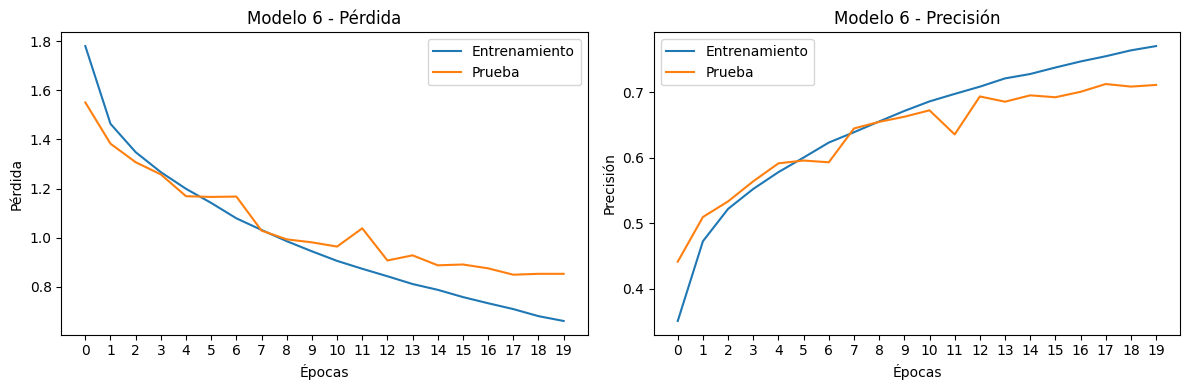

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo6.history.history['loss'])), y=modelo6.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo6.history.history['val_loss'])), y=modelo6.history.history['val_loss'], label='Prueba')
plt.title('Modelo 6 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo6.history.history['loss'])), range(len(modelo6.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo6.history.history['accuracy'])), y=modelo6.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo6.history.history['val_accuracy'])), y=modelo6.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 6 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo6.history.history['accuracy'])), range(len(modelo6.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis 1:
En la primera arquitectura, usamos las bases de modelos utilizados anteriormente para poder mejorar el rendimiento de base de nuestros modelos. Prueba de esto es que se está conservando el optimizador adaptativo Adamax. Anteriormente, este nos dio buenos resultados en conjunto con los modelos convolucionales en los que hemos trabajado. La arquitectura está conformada por 3 capas convolucionales y 2 capas de MaxPooling, además de 2 capas densas, una con 64 neuronas y la siguiente de salida. Los parámetros del kernel se mantuvieron, y el número de filtros se duplicó por capa convolucional. En la evaluación, se puede observar que el modelo se entrenó de manera relativamente correcta, pero con unos ligeros picos de pérdida dentro de las épocas 6 y 11. Estos son los mismos que vimos en modelos anteriores. A pesar de esto, la pérdida se mantuvo bastante baja, siendo cerca de 0.84 en validación de pérdida y, en el caso de la validación, se logró un 0.71, lo que equivale al 71% de precisión. Como se puede ver en el gráfico, a pesar del ligero sobreajuste que se genera a partir de la época 5 en adelante, no fue tan pronunciado como con otros optimizadores. Esto puede deberse al número de neuronas que se está utilizando, ya que no se está usando otro regularizador previamente probado, como Dropout. Aun así, la diferencia no es mayor al 6% en relación al entrenamiento y la validación.

### Modelo 6 (Padding y Pooling)

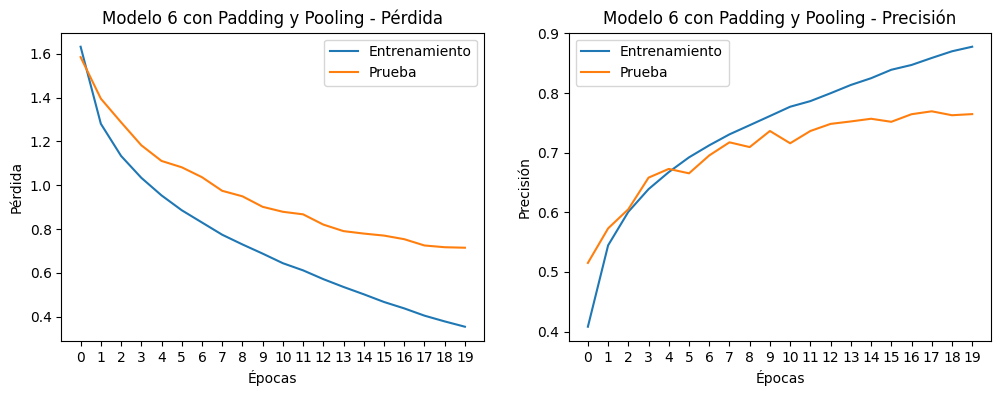

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo6_pd.history.history['loss'])), y=modelo6_pd.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo6_pd.history.history['val_loss'])), y=modelo6_pd.history.history['val_loss'], label='Prueba')
plt.title('Modelo 6 con Padding y Pooling - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo6_pd.history.history['loss'])), range(len(modelo6_pd.history.history['loss'])))

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo6_pd.history.history['accuracy'])), y=modelo6_pd.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo6_pd.history.history['val_accuracy'])), y=modelo6_pd.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 6 con Padding y Pooling - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo6_pd.history.history['accuracy'])), range(len(modelo6_pd.history.history['accuracy'])))

plt.show()


#### Análisis 2:
En el modelo 6 con Padding y Pooling, como bien se nombra, se agregó el hiperparámetro de padding = same para lograr mantener un mayor número de píxeles y dar la posibilidad de aumentar el número de capas dentro de la arquitectura, siendo ahora 3 capas de MaxPooling2D. También se agregó el regularizador Dropout al 25% en las primeras 2 capas y al 35% en la 3ra capa convolucional. A diferencia de la versión sin Padding, se utilizó una cantidad mayor de neuronas, llegando a 512. Lo cierto es que la precisión subió de una manera que, si bien no es tan significativa a nivel general, es relevante en términos de precisión. Llegando a un 75% de precisión y una disminución de la pérdida a 0.72. El problema viene con que, a pesar de que no se ven los picos de pérdida, lo que podría significar más estabilidad, es posible que el aumento drástico de neuronas haya causado un overfitting más pronunciado, pasando del 6% al 12% de diferencia entre el entrenamiento y la validación. Por lo tanto, aunque tenemos mejores resultados en precisión y pérdida, podría generarse un sesgo en el modelo. Por ahora, se mantiene mejor que el modelo 6.

313/313 [==============================] - 1s 2ms/step


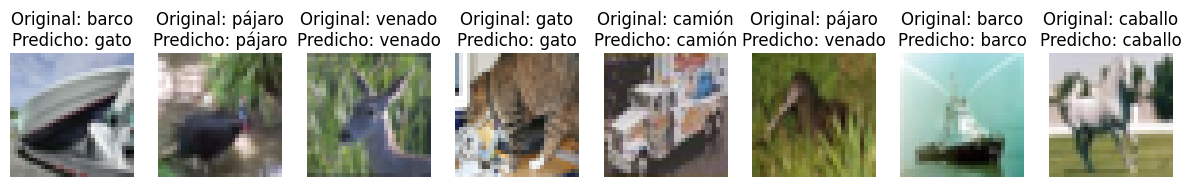

In [26]:
predicciones = modelo6_pd.predict(X_test)

indices_ejemplos = random.sample(range(len(imgs_test)), 8)

fig, axs = plt.subplots(1, 8, figsize=(15, 3))

for i in range(8):
    indice = indices_ejemplos[i]
    imagen = imgs_test[indice]
    nombre_original = nombres[labs_test[indice][0]]
    nombre_predicho = nombres[np.argmax(predicciones[indice])]

    axs[i].imshow(imagen)
    axs[i].set_title(f'Original: {nombre_original}\nPredicho: {nombre_predicho}')
    axs[i].axis('off')

plt.show()

### Modelo 7

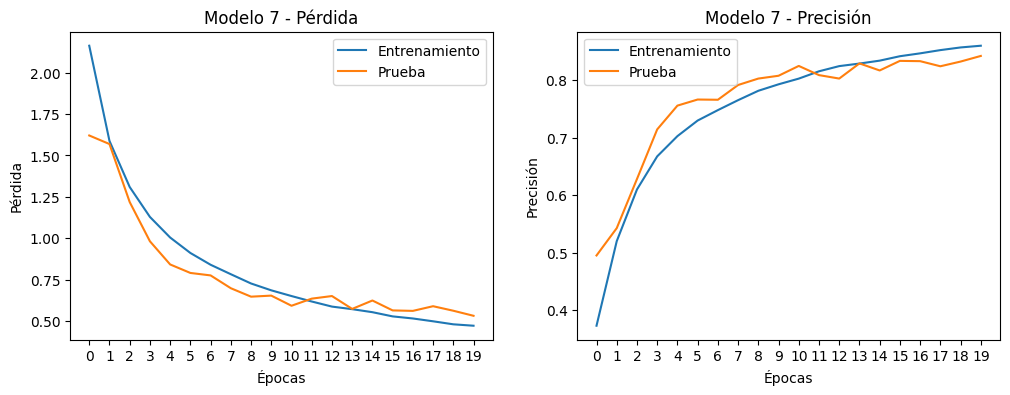

In [27]:
# Gráfico para el modelo7
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo7.history.history['loss'])), y=modelo7.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo7.history.history['val_loss'])), y=modelo7.history.history['val_loss'], label='Prueba')
plt.title('Modelo 7 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo7.history.history['loss'])), range(len(modelo7.history.history['loss'])))

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo7.history.history['accuracy'])), y=modelo7.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo7.history.history['val_accuracy'])), y=modelo7.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 7 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo7.history.history['accuracy'])), range(len(modelo7.history.history['accuracy'])))

plt.show()

#### Análisis:
El modelo 7 es el modelo con la arquitectura más extensa y compleja de las convolucionales. En un primer análisis, fue el que obtuvo mejores resultados. No solamente teniendo la menor pérdida, sino también el modelo con mayor precisión y menor diferencia entre entrenamiento y validación. También tiene picos de validación y pérdida, pero lo cierto es que la diferencia es bastante baja, siendo mucho mejor de lo que se mostró en el modelo 6 con padding, logrando un 82% de precisión y una validación de la pérdida de 0.62. Tiene la mejor capacidad de generalización de todos los modelos presentados hasta ahora. Para entender de qué está compuesta esta arquitectura, debemos dividirla en 4 secciones: una sección original y 2 duplicados de esta misma, finalizando con la sección de la capa fully connected. Las primeras 3 capas se componen de 2 capas convolucionales y 1 de MaxPooling2D, variando el número de filtros de la capa convolucional de 32, 64 y 128 respectivamente. Cada una tiene un regularizador de BatchNormalization después de cada capa convolucional, y luego de la capa de MaxPooling se usa un regularizador de Dropout, el cual aumenta su porcentaje de apagado de neuronas por sección, siendo el 20%, 30% y 40% respectivamente. En la sección FullyConnected se encuentra la capa flatten, nuestras capas densas y nuevamente con BatchNormalization y Dropout (esta vez con un 50% de desactivación de neuronas). La capa densa esta vez tiene 128 neuronas y un batch size de 64 en vez de 128. Además, a esta se aplicó el regularizador l2 con un hiperparámetro de 0.001. Lo cierto es que este modelo, si bien tiene una estructura muy extensa, también se compone de muchos regularizadores con el fin de mantener a raya el overfitting, con resultados realmente favorables.

# Despliegue

Aquí se muestra una cuadrícula utilizando como base el mejor modelo en función de las evaluaciones, en este caso el modelo sería el modelo 7. Por su capacidad de generalizacion se podria considerar un modelo bastante recomendable dentro del caso, teniendo una probabilidad de acierto de 8/10, lo cual ya es bastante considerable. A pesar de esto, si lo que se requiere es una menor falla, este modelo sigue siendo insuficiente dentro de la implementacion.

313/313 [==============================] - 1s 4ms/step


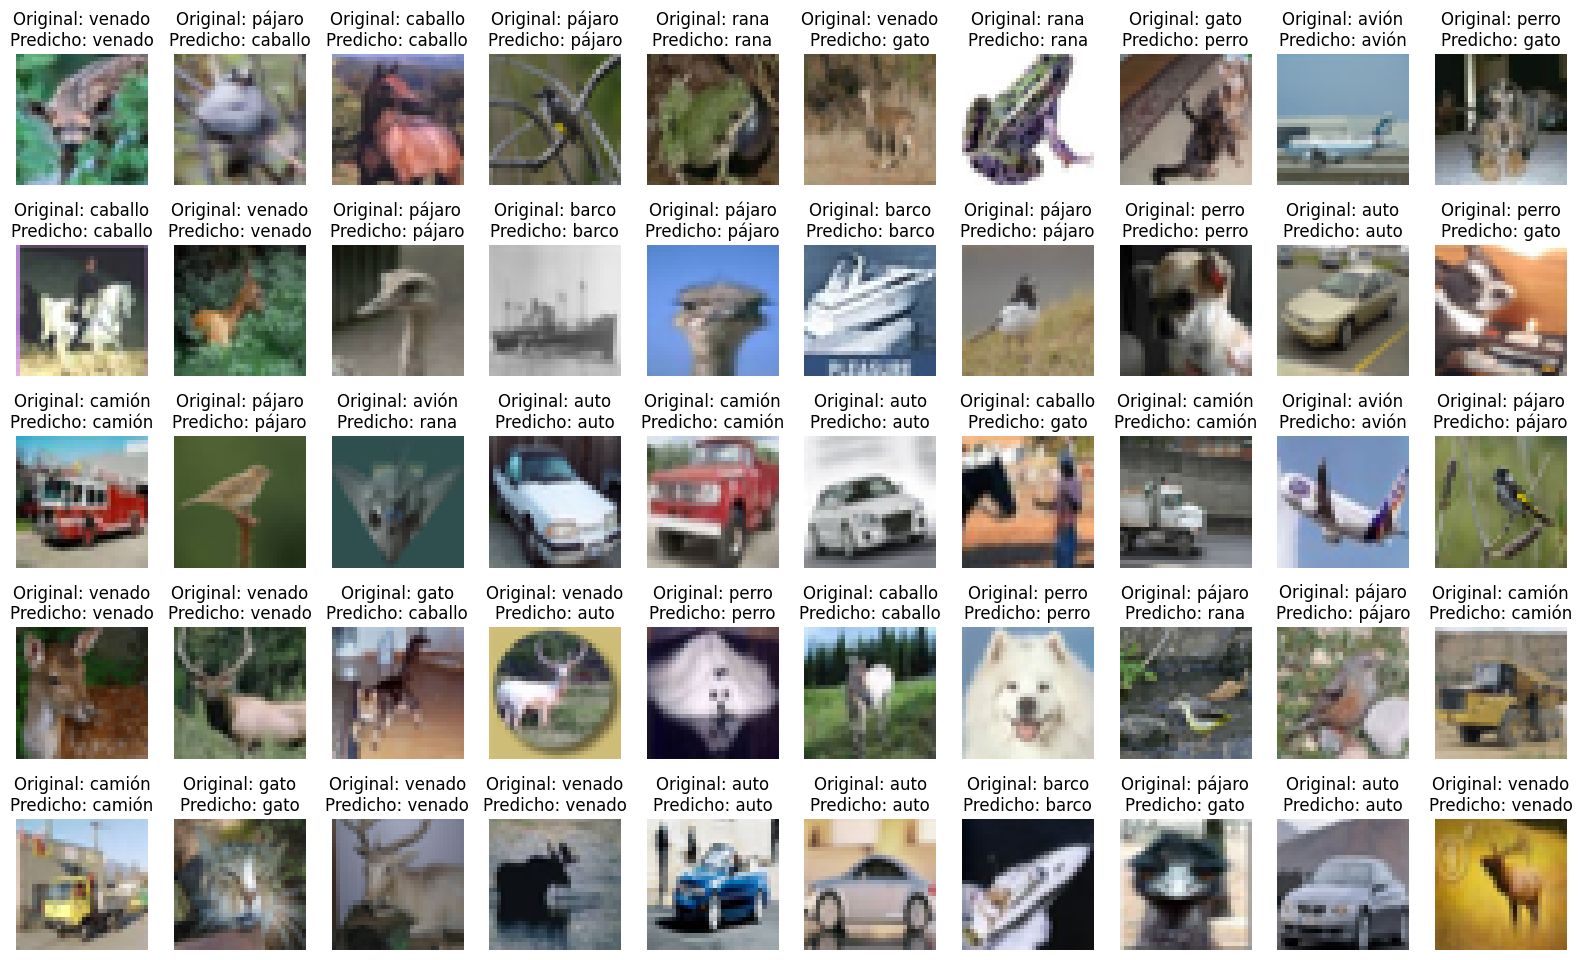

In [28]:
predicciones = modelo7.predict(X_test)

indices_ejemplos = random.sample(range(len(imgs_test)), h*w)

fig, axs = plt.subplots(h, w, figsize=(w+10, h+7))

for i in range(h):
    for j in range(w):
        indice = indices_ejemplos[i*w+j]
        imagen = imgs_test[indice]
        nombre_original = nombres[labs_test[indice][0]]
        nombre_predicho = nombres[np.argmax(predicciones[indice])]

        axs[i,j].imshow(imagen)
        axs[i,j].set_title(f'Original: {nombre_original}\nPredicho: {nombre_predicho}')
        axs[i,j].axis('off')

plt.show()


## Demostración

Dentro de la grilla de prueba, obtuvimos un resultado bastante favorable para lo esperado. La tasa de acierto fue de aproximadamente 4/5, lo que representa una capacidad de generalización bastante buena al predecir correctamente más de 38 de las 50 imágenes.


## Primero se sube una imagen que contenga algo de estos:
- Venado
- Caballo
- Camión
- Rana
- Avión
- Gato
- Perro
- Pájaro
- Auto
- Barco

## Formatos probados:
- JPEG/JPG
- WEBP
- PNG


In [29]:
import io
import time
from PIL import Image
from google.colab import files

uploaded_files = files.upload()
imagen_cargada = Image.open(io.BytesIO(uploaded_files[next(iter(uploaded_files))]))
imagen_cargada = imagen_cargada.resize((32, 32))
imagen_cargada = imagen_cargada.convert('RGB')
imagen_array = np.array(imagen_cargada)
imagen_array = imagen_array / 255.0
imagen_array = np.expand_dims(imagen_array, axis=0)
nombre_original = "no se"


Saving Labrador_Retriever_(1210559).jpg to Labrador_Retriever_(1210559).jpg


## Despues se indica que tiene la imagen (esto en caso de prueba)

In [30]:
nombre_original = input("Ingrese el contenido original de la imagen: ")

Ingrese el contenido original de la imagen: Perro


1/1 [==============================] - 0s 210ms/step


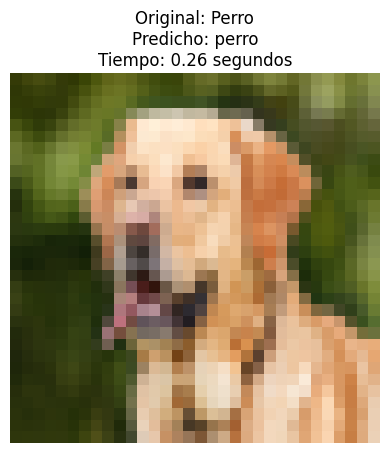

In [31]:
start_time = time.time()
prediccion = modelo7.predict(imagen_array)
end_time = time.time()
etiqueta_predicha = nombres[np.argmax(prediccion)]
tiempo_transcurrido = end_time - start_time
plt.imshow(imagen_cargada)
plt.title(f'Original: {nombre_original}\nPredicho: {etiqueta_predicha}\nTiempo: {tiempo_transcurrido:.2f} segundos')
plt.axis('off')
plt.show()

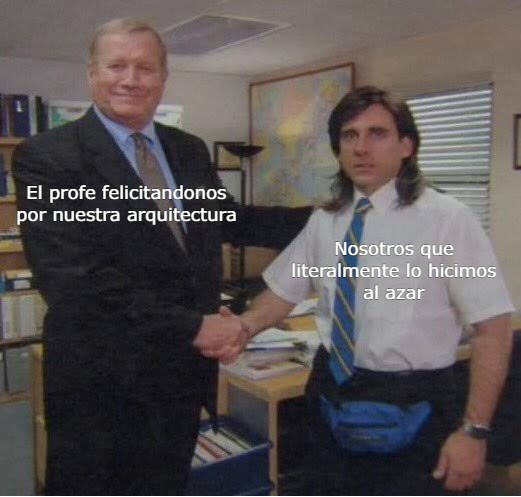